In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('Train.xlsx')

1) Drop Region Column

In [10]:
unique_values_counts = df["Region"].value_counts()
unique_values_counts

Region
Statewide    41053
Name: count, dtype: int64

2) Imputing GVWR Class

Vehicle Category 'T1': Unique GVWR Classes: [1]
Vehicle Category 'T2': Unique GVWR Classes: [1]
Vehicle Category 'T3': Unique GVWR Classes: [2]
Vehicle Category 'T4': Unique GVWR Classes: [2]
Vehicle Category 'T5': Unique GVWR Classes: [3]
Vehicle Category 'T6': Unique GVWR Classes: [5, 6, 7, 4]
Vehicle Category 'T7': Unique GVWR Classes: [8]


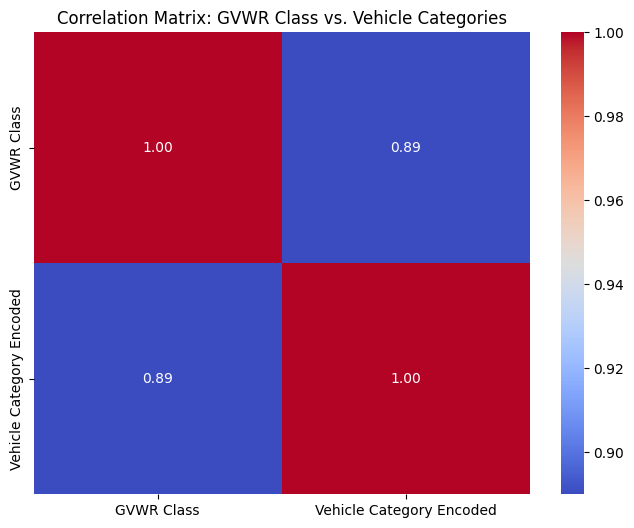

In [ ]:
vehicle_categories = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']

for category in vehicle_categories:
    unique_values = df[df['Vehicle Category'] == category]['GVWR Class'].unique()
    unique_values = [value for value in unique_values if value != "Unknown"]
    print(f"Vehicle Category '{category}': Unique GVWR Classes: {unique_values}")

unknown_mapping = {
    'T1': '1', 'T2': '1',
    'T3': '2', 'T4': '2',
    'T5': '3', 'T6': '4',
    'T7': '8',
}

df.loc[df['GVWR Class'] == 'Unknown', 'GVWR Class'] = df.loc[df['GVWR Class'] == 'Unknown', 'Vehicle Category'].map(unknown_mapping)
df["GVWR Class"] = df["GVWR Class"].replace("Not Applicable", 0)
df["GVWR Class"] = df["GVWR Class"].astype(int)

relevant_categories = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']
df = df[df['Vehicle Category'].isin(relevant_categories)]

df['Vehicle Category Encoded'] = df['Vehicle Category'].map({
    'T1': 1, 'T2': 1, 'T3': 2, 'T4': 2, 'T5': 3, 'T6': 6, 'T7': 8
})

corr_matrix = df[['GVWR Class', 'Vehicle Category Encoded']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: GVWR Class vs. Vehicle Categories")
plt.show()

2) Deriving Vehicle Age

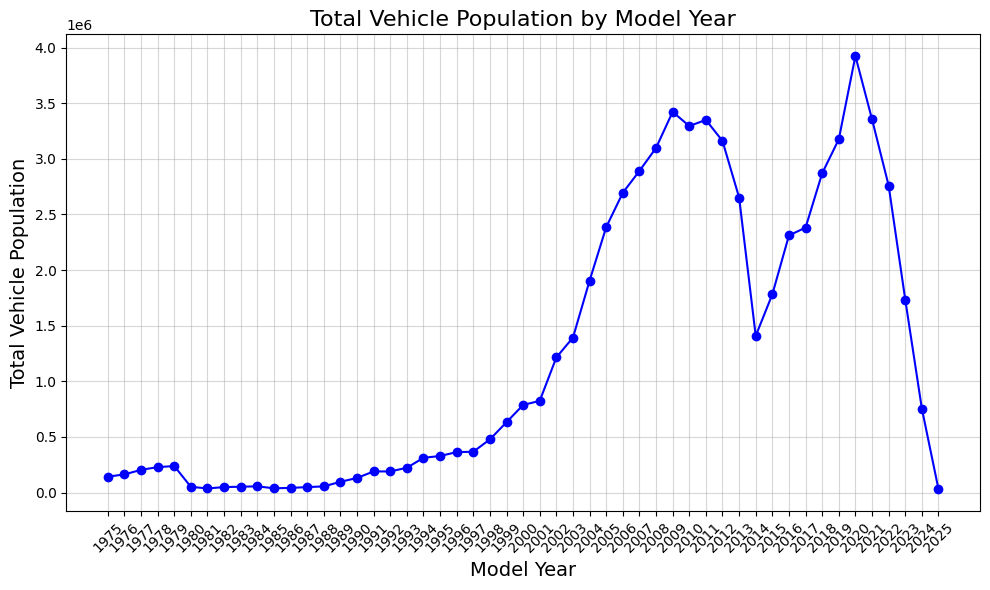

In [ ]:
model_year_population = df.groupby('Model Year')['Vehicle Population'].sum()
model_year_population = model_year_population.sort_index()

plt.figure(figsize=(10, 6))
plt.plot(model_year_population.index, model_year_population.values, marker='o', linestyle='-', color='b')
plt.title('Total Vehicle Population by Model Year', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Total Vehicle Population', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(model_year_population.index, rotation=45)
plt.tight_layout()
plt.show()


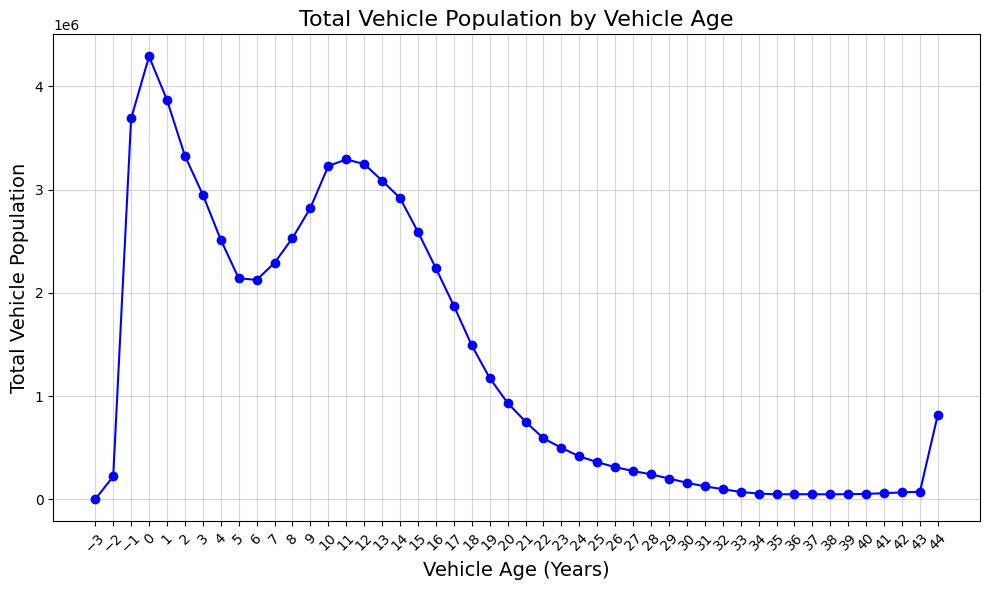

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df.dropna(subset=['Model Year'], inplace=True)
df["Date"] = df["Date"].astype(int)
df["Model Year"] = df["Model Year"].astype(int)
df["vehicle_age"] = df["Date"] - df["Model Year"]

vehicle_age_population = df.groupby('vehicle_age')['Vehicle Population'].sum()

vehicle_age_population = vehicle_age_population.sort_index()

plt.figure(figsize=(10, 6))
plt.plot(vehicle_age_population.index, vehicle_age_population.values, marker='o', linestyle='-', color='b')
plt.title('Total Vehicle Population by Vehicle Age', fontsize=16)
plt.xlabel('Vehicle Age (Years)', fontsize=14)
plt.ylabel('Total Vehicle Population', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(vehicle_age_population.index, rotation=45)
plt.tight_layout()
plt.show()


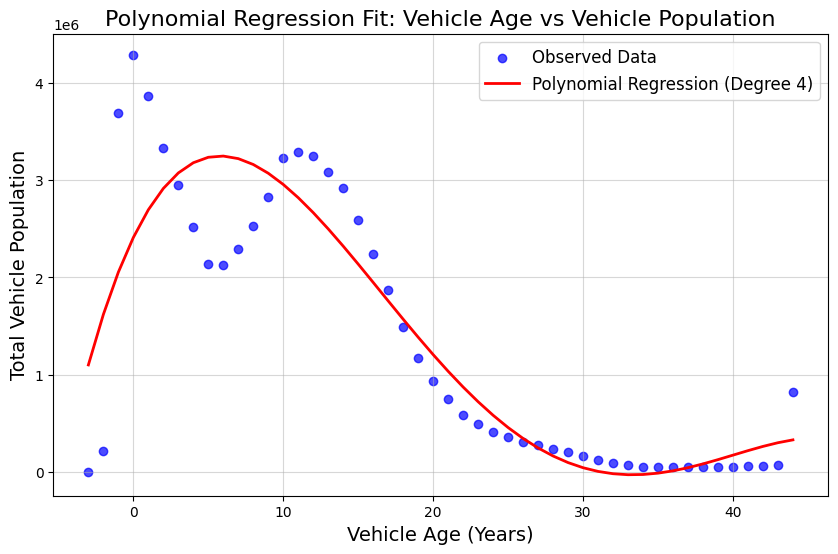

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = vehicle_age_population.index.values.reshape(-1, 1)
y = vehicle_age_population.values

degree = 4
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Observed Data', alpha=0.7)
plt.plot(X, y_pred, color='red', label=f'Polynomial Regression (Degree {degree})', linewidth=2)
plt.title('Polynomial Regression Fit: Vehicle Age vs Vehicle Population', fontsize=16)
plt.xlabel('Vehicle Age (Years)', fontsize=14)
plt.ylabel('Total Vehicle Population', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()
